# Dataset analysis

## Hypotheses:
- The longer the joke, the more upvotes it gets
- The more unpopular words in a joke, the less upvotes it gets
- If the setup is a question, the joke will get more upvotes

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from tqdm import tqdm
from statistics import mean
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns

In [50]:
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("rJokesData/data/preprocessed.csv")
df = df.dropna(axis=0)
df.sort_values("score", ascending=False)[:10]

,joke,body,punchline,score,date
333863,Calm down about the Net Neutrality thing... Paying additional money to access certain sites will give you a sense of pride and accomplishment.,Paying additional money to access certain sites will give you a sense of pride and accomplishment.,Calm down about the Net Neutrality thing...,136353.0,1.511295e+09
298084,V V *Edit: seems like the ctrl key on my keyboard is not working,V\n\n*Edit: seems like the ctrl key on my keyboard is not working\n\n,V,106420.0,1.499278e+09
526982,If your surprised that Jeffrey Epstein commited suicide this morning Imagine how surprised he must have been. Edit: Thank you to the Redditors that awarded this post. To everybody else I’m sorry I typed your instead of you’re.,Imagine how surprised he must have been.\n\nEdit: Thank you to the Redditors that awarded this post. To everybody else I’m sorry I typed your instead of you’re.,If your surprised that Jeffrey Epstein commited suicide this morning,103654.0,1.565449e+09
425075,"A new Navy recruit has his first day on the submarine... He speaks with the officer, who assigns him his post. ""Go stand at the periscope entry-way, and make sure no unauthorized personnel touch the periscope."" The recruit follows orders, and stands by the periscope. After 15 minutes, the officer stops by. ""Son I'm changing your post to the mess hall. Go in there and start washing some dishes."" The recruit obeys, and heads to the mess hall. He's cleaned about 3 dishes when the officer walks up again. ""Listen here recruit, your new post is in the supply room. I need you to make sure everything is strapped down tight, in case of rough waters."" The recruit again follows orders, and heads off to the supply room. There, he sees a crewman, moving some boxes. ""Hey there,"" says the recruit. ""is it normal to keep getting reassigned to new posts all day? I haven't kept one position for more than 15 minutes!"" The crewman says ""Oh yeah- this sub is full of reposts.""","He speaks with the officer, who assigns him his post.\n\n""Go stand at the periscope entry-way, and make sure no unauthorized personnel touch the periscope.""\n\nThe recruit follows orders, and stands by the periscope. After 15 minutes, the officer stops by.\n\n""Son I'm changing your post to the mess hall. Go in there and start washing some dishes.""\n\nThe recruit obeys, and heads to the mess hall. He's cleaned about 3 dishes when the officer walks up again.\n\n""Listen here recruit, your new post is in the supply room. I need you to make sure everything is strapped down tight, in case of rough waters.""\n\nThe recruit again follows orders, and heads off to the supply room. There, he sees a crewman, moving some boxes.\n\n""Hey there,"" says the recruit. ""is it normal to keep getting reassigned to new posts all day? I haven't kept one position for more than 15 minutes!""\n\nThe crewman says ""Oh yeah- this sub is full of reposts.""",A new Navy recruit has his first day on the submarine...,98257.0,1.539007e+09
356234,"The only two white actors in Black Panther are Martin Freeman, who played Bilbo Baggins, and Andy Serkis who played Gollum. They're the Tolkien white guys. Edit: Apparently somebody posted this joke to Twitter in October and that makes me a piece of shit. ¯\\\_(ツ)_/¯",They're the Tolkien white guys.\n\nEdit: Apparently somebody posted this joke to Twitter in October and that makes me a piece of shit.\n\n¯\\\_(ツ)_/¯,"The only two white actors in Black Panther are Martin Freeman, who played Bilbo Baggins, and Andy Serkis who played Gollum.",94941.0,1.518367e+09
339912,"Ajit Pai. That's it. That's the whole fucking joke. EDIT: Removed edits, people don't like those. [](/rdcry)","That's it. That's the whole fucking joke.\n\nEDIT: Removed edits, people don't like those. [](/rdcry)",Ajit Pai.,94415.0,1.513275e+09
544364,What did the reddit user say after detonating a bomb inside a bank? EDIT: Wow! This blew up! Thanks for the gold!,EDIT: Wow! This blew up! Thanks for

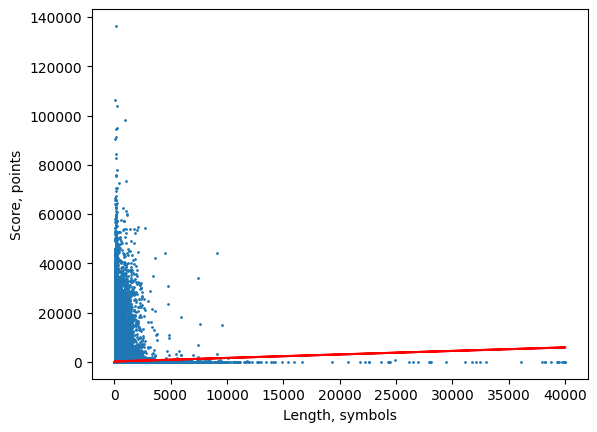

In [62]:
df = df.sort_values("score", ascending=False)
lenghts = [len(joke) for joke in df.loc[:, "joke"]]
scores = df.loc[:, "score"]

plt.scatter(lenghts, scores, s=1)
plt.xlabel("Length, symbols")
plt.ylabel("Score, points")
z = np.polyfit(lenghts, scores, 1)
p = np.poly1d(z)
plt.plot(lenghts, p(lenghts), color="red")

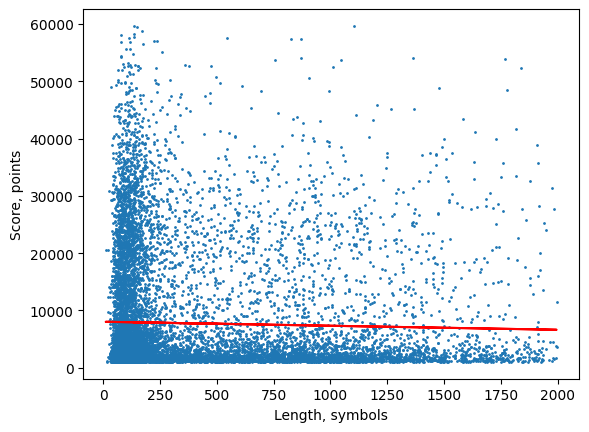

In [63]:
df2 = df
df2["len"] = [len(joke) for joke in df.loc[:, "joke"]]
df2 = df2[(df.loc[:, "len"] < 2000) & (df.loc[:, "score"] < 60000) & (df.loc[:, "score"] > 1000)]
lenghts2 = df2.loc[:, "len"]
scores2 = df2.loc[:, "score"]
plt.scatter(lenghts2, scores2, s=1)
plt.xlabel("Length, symbols")
plt.ylabel("Score, points")
z = np.polyfit(lenghts2, scores2, 1)
p = np.poly1d(z)
plt.plot(lenghts2, p(lenghts2), color="red")

In [45]:
frequency_dict = dict()

text = " ".join(df.loc[:, "joke"])
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(text.lower())

for word in tqdm(tokens):
    frequency_dict[word] = frequency_dict.setdefault(word, 0) + 1

100%|██████████| 26407818/26407818 [00:06<00:00, 3990438.31it/s]


In [56]:
stopw = stopwords.words('english')

In [60]:
def freq_score(text):
    tokens = tokenizer.tokenize(text.lower())
    freqs = [frequency_dict[word] for word in tokens if word not in stopw]
    if freqs:
        return mean(freqs)
    else:
        return 0

df3 = df
df3["freqscore"] = [freq_score(joke) for joke in tqdm(df.loc[:, "joke"])]
x = df3.loc[:, "freqscore"]
y = df3.loc[:, "score"]

100%|██████████| 567565/567565 [00:42<00:00, 13505.17it/s]


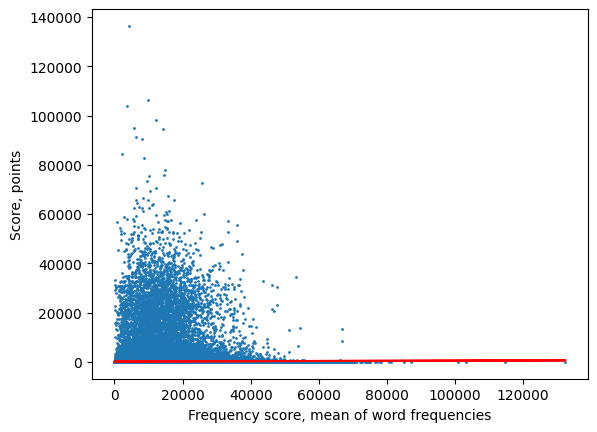

In [61]:
plt.scatter(x, y, s=1)
plt.xlabel("Frequency score, mean of word frequencies")
plt.ylabel("Score, points")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="red")

In [79]:
def is_a_question(text):
    match = re.match(r"(.*\?)", text)
    return not (match is None)

In [82]:
df4 = df
df4["is_a_question"] = [is_a_question(setup) for setup in tqdm(df.loc[:, "punchline"])]


100%|██████████| 567565/567565 [00:00<00:00, 1279490.21it/s]


Text(0.5, 1.0, 'Setup is NOT a question')

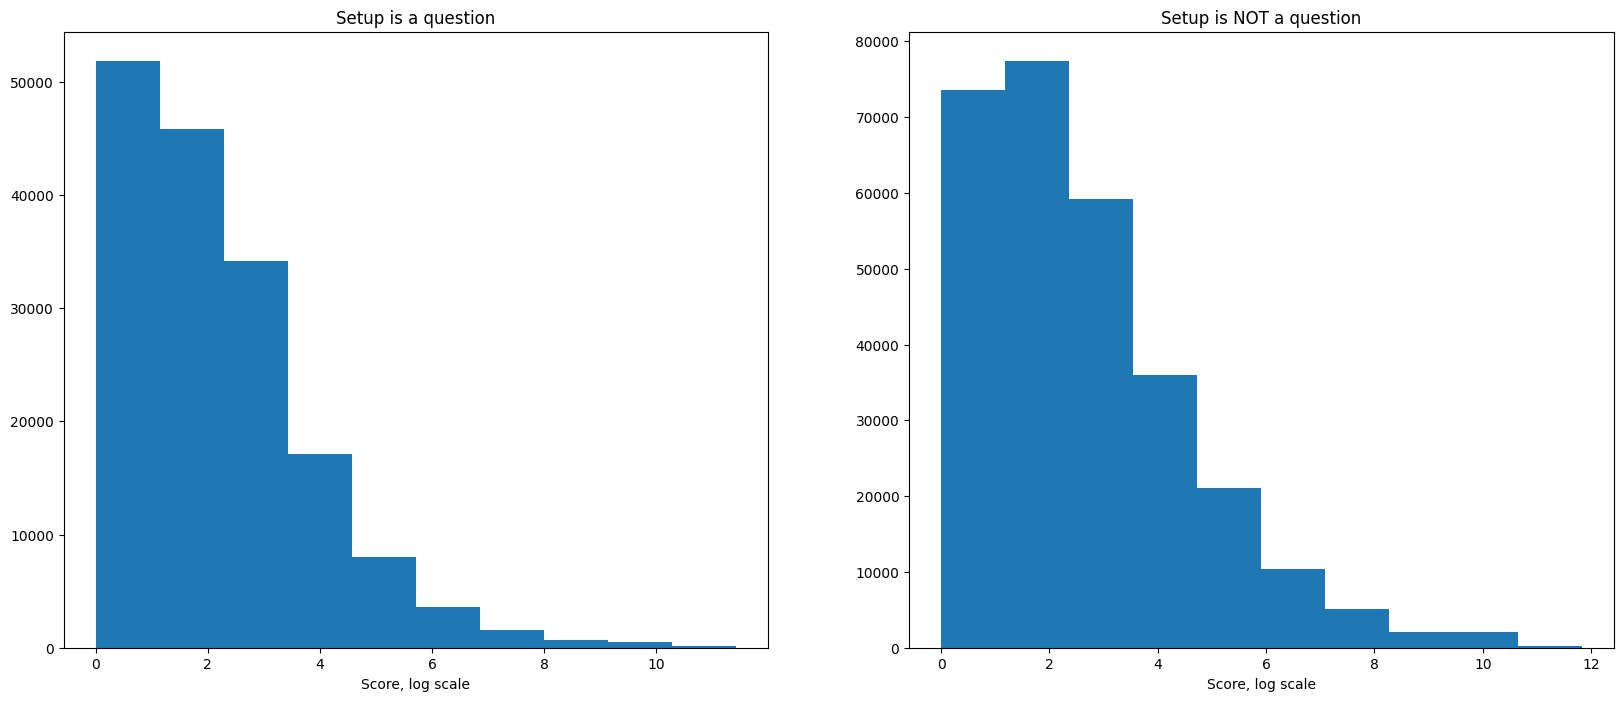

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
x_true = df4[(df4.loc[:, "is_a_question"] == True) & (df4.loc[:, "score"] > 0)].loc[:, "score"]
x_false = df4[(df4.loc[:, "is_a_question"] == False) & (df4.loc[:, "score"] > 0)].loc[:, "score"]

axs[0].hist(np.log(x_true))
axs[0].set_xlabel("Score, log scale")
axs[0].set_title("Setup is a question")
axs[1].hist(np.log(x_false))
axs[1].set_xlabel("Score, log scale")
axs[1].set_title("Setup is NOT a question")